In [1]:
import os
import pickle
import warnings
import numpy as np
from FeaturesExtractor import FeaturesExtractor

In [3]:
warnings.filterwarnings("ignore")

In [3]:
y_pred=[]
y_true=[]

In [4]:

class GenderIdentifier:

    def __init__(self, females_files_path, males_files_path, females_model_path, males_model_path):
        self.females_training_path = females_files_path
        self.males_training_path   = males_files_path
        self.error                 = 0
        self.total_sample          = 0
        self.features_extractor    = FeaturesExtractor()
        # load models
        self.females_gmm = pickle.load(open(females_model_path, 'rb'))
        self.males_gmm   = pickle.load(open(males_model_path, 'rb'))

    def process(self):
        files = self.get_file_paths(self.females_training_path, self.males_training_path)
        # read the test directory and get the list of test audio files
        for file in files:
            self.total_sample += 1
            print("%10s %8s %1s" % ("--> TESTING", ":", os.path.basename(file)))

            vector = self.features_extractor.extract_features(file)
            winner = self.identify_gender(vector)
            expected_gender = file.split("/")[1][:-1]
            y_true.append(expected_gender)
            y_pred.append(winner)
            
            print("%10s %6s %1s" % ("+ EXPECTATION",":", expected_gender))
            print("%10s %3s %1s" %  ("+ IDENTIFICATION", ":", winner))

            if winner != expected_gender: self.error += 1
            print("----------------------------------------------------")

        accuracy     = ( float(self.total_sample - self.error) / float(self.total_sample) ) * 100
        accuracy_msg = "*** Accuracy = " + str(round(accuracy, 3)) + "% ***"
        print(accuracy_msg)

    def get_file_paths(self, females_training_path, males_training_path):
        # get file paths
        females = [ os.path.join(females_training_path, f) for f in os.listdir(females_training_path) ]
        males   = [ os.path.join(males_training_path, f) for f in os.listdir(males_training_path) ]
        files   = females + males
        return files

    def identify_gender(self, vector):
        # female hypothesis scoring
        is_female_scores         = np.array(self.females_gmm.score(vector))
        is_female_log_likelihood = is_female_scores.sum()
        # male hypothesis scoring
        is_male_scores         = np.array(self.males_gmm.score(vector))
        is_male_log_likelihood = is_male_scores.sum()

        print("%10s %5s %1s" % ("+ FEMALE SCORE",":", str(round(is_female_log_likelihood, 3))))
        print("%10s %7s %1s" % ("+ MALE SCORE", ":", str(round(is_male_log_likelihood,3))))

        if is_male_log_likelihood > is_female_log_likelihood: winner = "male"
        else                                                : winner = "female"
        return winner


if __name__== "__main__":
    gender_identifier = GenderIdentifier("TestingData/females", "TestingData/males", "females.gmm", "males.gmm")
    gender_identifier.process()

--> TESTING        : FemaleSad38.wav
+ FEMALE SCORE     : 449.598
+ MALE SCORE       : -136.172
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad10.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 5464.398
+ MALE SCORE       : 3590.905
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad53.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


+ FEMALE SCORE     : 151.916
+ MALE SCORE       : -114.81
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad7.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 6414.094
+ MALE SCORE       : 4181.318
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad29.wav
+ FEMALE SCORE     : 1011.882
+ MALE SCORE       : 770.7
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad40.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 619.39
+ MALE SCORE       : -334.538
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad42.wav
+ FEMALE SCORE     : 217.887
+ MALE SCORE       : -312.459
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad14.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


+ FEMALE SCORE     : -50.769
+ MALE SCORE       : -380.61
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad5.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 5528.575
+ MALE SCORE       : 3866.241
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad20.wav
+ FEMALE SCORE     : -168.845
+ MALE SCORE       : -463.501
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad11.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


+ FEMALE SCORE     : 8683.404
+ MALE SCORE       : 5440.646
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad8.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 6508.873
+ MALE SCORE       : 4191.655
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad17.wav
+ FEMALE SCORE     : -375.556
+ MALE SCORE       : -695.459
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad30.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 237.921
+ MALE SCORE       : 56.873
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad18.wav
+ FEMALE SCORE     : -215.456
+ MALE SCORE       : -382.982
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad41.wav
+ FEMALE SCORE     : 492.887
+ MALE SCORE       : 23.595
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad27.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


+ FEMALE SCORE     : 1156.435
+ MALE SCORE       : 707.858
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad6.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 5233.742
+ MALE SCORE       : 3943.145
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad22.wav
+ FEMALE SCORE     : -359.546
+ MALE SCORE       : -1002.173
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad25.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 846.547
+ MALE SCORE       : 429.407
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad24.wav
+ FEMALE SCORE     : -71.104
+ MALE SCORE       : -599.773
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad43.wav
+ FEMALE SCORE     : 331.285
+ MALE SCORE       : 50.098
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad49.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 73.194
+ MALE SCORE       : -105.58
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad34.wav
+ FEMALE SCORE     : 206.378
+ MALE SCORE       : -273.946
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad12.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 5723.733
+ MALE SCORE       : 3488.949
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad50.wav
+ FEMALE SCORE     : 521.075
+ MALE SCORE       : 173.337
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad26.wav
+ FEMALE SCORE     : 864.729
+ MALE SCORE       : 624.194
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad28.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 592.701
+ MALE SCORE       : 533.662
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad19.wav
+ FEMALE SCORE     : -310.375
+ MALE SCORE       : -782.567
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad46.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 656.398
+ MALE SCORE       : 61.993
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad52.wav
+ FEMALE SCORE     : 837.917
+ MALE SCORE       : 300.974
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad33.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 406.781
+ MALE SCORE       : -339.23
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad21.wav
+ FEMALE SCORE     : -299.949
+ MALE SCORE       : -894.339
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad23.wav
+ FEMALE SCORE     : -213.916
+ MALE SCORE       : -553.065
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad36.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 253.086
+ MALE SCORE       : -264.175
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad31.wav
+ FEMALE SCORE     : -141.465
+ MALE SCORE       : -965.748
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad2.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 6266.049
+ MALE SCORE       : 4001.671
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad39.wav
+ FEMALE SCORE     : 1044.815
+ MALE SCORE       : 334.294
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad15.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


+ FEMALE SCORE     : 79.757
+ MALE SCORE       : -360.746
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad3.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 6845.98
+ MALE SCORE       : 4558.4
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad32.wav
+ FEMALE SCORE     : 442.889
+ MALE SCORE       : 490.15
+ EXPECTATION      : female
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : FemaleSad9.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 7243.109
+ MALE SCORE       : 4739.198
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad44.wav
+ FEMALE SCORE     : 375.463
+ MALE SCORE       : -109.465
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad48.wav
+ FEMALE SCORE     : 695.991
+ MALE SCORE       : 280.033
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad51.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 451.852
+ MALE SCORE       : 139.194
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad45.wav
+ FEMALE SCORE     : 314.023
+ MALE SCORE       : 129.391
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad54.wav
+ FEMALE SCORE     : 229.064
+ MALE SCORE       : -154.508
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad47.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 375.059
+ MALE SCORE       : -121.442
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad13.wav
+ FEMALE SCORE     : -450.419
+ MALE SCORE       : -791.757
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad37.wav
+ FEMALE SCORE     : 236.45
+ MALE SCORE       : -432.816
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad35.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 361.505
+ MALE SCORE       : -387.94
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad16.wav
+ FEMALE SCORE     : -386.501
+ MALE SCORE       : -648.5
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad4.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


+ FEMALE SCORE     : 6077.114
+ MALE SCORE       : 3967.407
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : FemaleSad1.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


+ FEMALE SCORE     : 6832.952
+ MALE SCORE       : 4162.679
+ EXPECTATION      : female
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : MaleSad71.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : -2509.342
+ MALE SCORE       : 225.239
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad69.wav
+ FEMALE SCORE     : -3368.393
+ MALE SCORE       : -758.85
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad41.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : -115.154
+ MALE SCORE       : 333.178
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad62.wav
+ FEMALE SCORE     : -3217.436
+ MALE SCORE       : -1034.429
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad70.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : -2327.545
+ MALE SCORE       : -800.091
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad66.wav
+ FEMALE SCORE     : -2950.065
+ MALE SCORE       : -474.892
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad6.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 589.528
+ MALE SCORE       : 2234.498
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad12.wav
+ FEMALE SCORE     : 2068.214
+ MALE SCORE       : 3323.724
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad54.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : -212.096
+ MALE SCORE       : 31.287
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad46.wav
+ FEMALE SCORE     : 430.321
+ MALE SCORE       : 512.383
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad53.wav
+ FEMALE SCORE     : -934.641
+ MALE SCORE       : -785.604
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad45.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 177.11
+ MALE SCORE       : 444.239
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad63.wav
+ FEMALE SCORE     : -4114.182
+ MALE SCORE       : -1787.398
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad42.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 1371.026
+ MALE SCORE       : 1584.542
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad51.wav
+ FEMALE SCORE     : -600.517
+ MALE SCORE       : -626.23
+ EXPECTATION      : male
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : MaleSad57.wav
+ FEMALE SCORE     : -275.818
+ MALE SCORE       : -261.806
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad52.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : -615.49
+ MALE SCORE       : -594.166
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad68.wav
+ FEMALE SCORE     : -2471.952
+ MALE SCORE       : -600.245
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad10.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


+ FEMALE SCORE     : 2722.17
+ MALE SCORE       : 4469.825
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad7.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 962.657
+ MALE SCORE       : 3226.127
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad59.wav
+ FEMALE SCORE     : 553.258
+ MALE SCORE       : 615.066
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad64.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


+ FEMALE SCORE     : -1983.988
+ MALE SCORE       : -413.409
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad2.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 1893.449
+ MALE SCORE       : 3716.093
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad48.wav
+ FEMALE SCORE     : 457.539
+ MALE SCORE       : 627.102
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad72.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : -588.097
+ MALE SCORE       : 451.922
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad55.wav
+ FEMALE SCORE     : 239.847
+ MALE SCORE       : 593.651
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad9.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 1883.057
+ MALE SCORE       : 4114.175
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad8.wav
+ FEMALE SCORE     : 1537.531
+ MALE SCORE       : 3434.768
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad65.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : -4449.325
+ MALE SCORE       : -1528.269
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad1.wav
+ FEMALE SCORE     : 667.977
+ MALE SCORE       : 2396.473
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad47.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 39.37
+ MALE SCORE       : 291.858
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad50.wav
+ FEMALE SCORE     : -1106.296
+ MALE SCORE       : -1100.116
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad11.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 1842.255
+ MALE SCORE       : 3124.452
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad43.wav
+ FEMALE SCORE     : -184.25
+ MALE SCORE       : 155.853
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad3.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 1027.871
+ MALE SCORE       : 2623.37
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad61.wav
+ FEMALE SCORE     : -3529.67
+ MALE SCORE       : -932.494
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad60.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 395.648
+ MALE SCORE       : 404.188
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad56.wav
+ FEMALE SCORE     : 376.456
+ MALE SCORE       : 530.288
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad40.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 890.393
+ MALE SCORE       : 881.125
+ EXPECTATION      : male
+ IDENTIFICATION   : female
----------------------------------------------------
--> TESTING        : MaleSad58.wav
+ FEMALE SCORE     : 570.918
+ MALE SCORE       : 660.208
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad67.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : -3494.138
+ MALE SCORE       : -907.187
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad49.wav
+ FEMALE SCORE     : -135.827
+ MALE SCORE       : -26.724
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad4.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 2374.675
+ MALE SCORE       : 4149.025
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad44.wav
+ FEMALE SCORE     : 377.347
+ MALE SCORE       : 508.346
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad38.wav


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77

+ FEMALE SCORE     : 431.8
+ MALE SCORE       : 680.146
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad37.wav
+ FEMALE SCORE     : 158.113
+ MALE SCORE       : 396.401
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad39.wav
+ FEMALE SCORE     : 335.004
+ MALE SCORE       : 534.184
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
--> TESTING        : MaleSad5.wav
+ FEMALE SCORE     : 1228.882
+ MALE SCORE       : 3140.733
+ EXPECTATION      : male
+ IDENTIFICATION   : male
----------------------------------------------------
*** Accuracy = 97.059% ***


/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/mukund/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


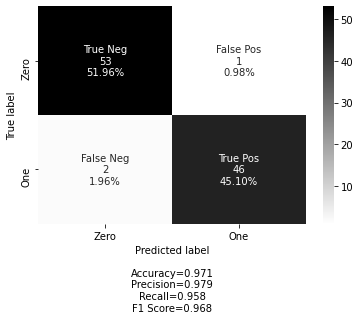

In [31]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

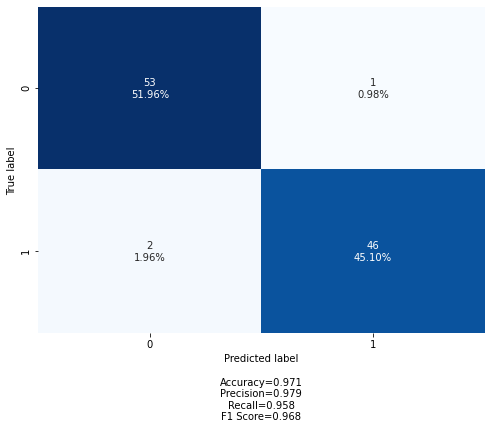

In [32]:
make_confusion_matrix(cm, figsize=(8,6), cbar=False)